# Logistic Regression Used on the Infamous Titanic dataset

### First Ofcourse the imports!!!!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib','inline')

### Lets import the data first using the pandas inbuilt read_csv function

In [2]:
train=pd.read_csv('titanic_train.csv')

### Lets look around the data we have got first

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Note that we don't have numerical data everywhere!! We need to do something with those later

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### On observing the info it's clear that we have some missing data in the "Age" and "Cabin" columns
Let's visualize the missing data using heatmap of seaborn

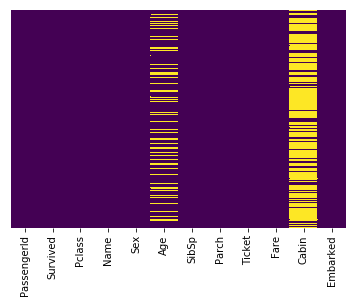

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### As this is a very simple demo of Logistic Regression we WOULD"NT do any imputation and would just simply drop the missing rows for simplicity!!

In [6]:
train.dropna(inplace=True)

#### Let's check again

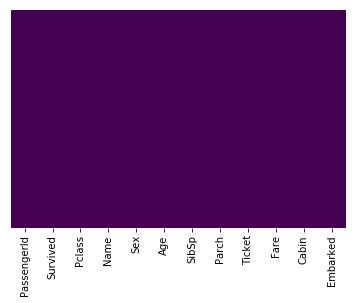

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### So we have got that sorted!!! Now it's a small matter of converting Categorial Data into Numerical one using pandas get_dummies()

### But again this is a simple demo so i will only consider the sex and embarkment columns for evaluation and drop others like Name,Ticket,Cabin,PassengerId and Sex & Embarkment as well (because we already converted them into numerical data :)

In [8]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

### We now concatenate these new dummy columns to the main train data using pd.concat()

In [9]:
train=pd.concat([train,sex,embark],axis=1)

### Now it's time to drop all the columns we discussed earlier!!

In [10]:
train.drop(['Sex','Name','Ticket','Embarked','Cabin','PassengerId'],axis=1,inplace=True)

### Great! Now let's check the data again!!

In [19]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


### Now let's import Logistic Regression from scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression

### Instantiating the model

In [14]:
logmodel=LogisticRegression()

### We will simply do a train test split and not go into k-fold cross validation 
#### let's do it all in one line ;)

In [15]:
X=train.drop("Survived",axis=1)
y=train["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Now the good old fit() and predict()

In [16]:
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### We will evaluate our model using classification report of scikit-learn

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60        20
           1       0.79      0.63      0.70        35

   micro avg       0.65      0.65      0.65        55
   macro avg       0.65      0.66      0.65        55
weighted avg       0.69      0.65      0.66        55



### We the weighted-average precision score is 69%. :p 
### It's not bad considering that it's just a baseline model and there is loads of room for improvement.. Try to extract some features from the data by visualizing the data or try hyperparameter tuning ;p I leave it upto u to improve upon this model!!!